In [28]:
import re
import jieba
import numpy as np
import pandas as pd
import matplotlib as mpl 
from pyecharts import Geo
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import mpl

In [29]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['legend.fontsize']=12
plt.rcParams['figure.figsize']=[15,9]

In [30]:
data=pd.read_csv(r'zhihu_2222.csv',encoding='utf-8')

In [31]:
data.head(11000)

,Unnamed: 0,知乎名称,个人介绍,性别,是否为知乎会员,粉丝数,知乎回答数
0,6335,久病成医的晓老师,关注公众号搜 摸鱼情感教育,男,会员,164459,1014
1,10772,ALEX YA,公众号：bewithalexya,女,非会员,122759,132
2,10644,量子位,有趣的前沿科技→_→ 公众号：QbitAI,不详,非会员,98226,94
3,10154,巴巴罗莎,NaN,男,非会员,87590,214
4,10922,门徒,我能做的，只是不说假话。,男,非会员,77232,146
5,2317,其林,公众号：其林说,不详,非会员,55527,410
6,5797,麦龟迪,王者荣耀S13荣耀王者74星 公众号：手游最攻略 ins骨灰级玩家,男,非会员,41414,37
7,4034,恒子,周身笼罩着无比纯洁的气场。,男,非会员,25246,340
8,1957,Forever snow,数字IC设计工程师,男,会员,18278,197
9,9248,百步穿型Mr.Q,微信751063005 发型设计值乎提问,男,非会员,18105,67


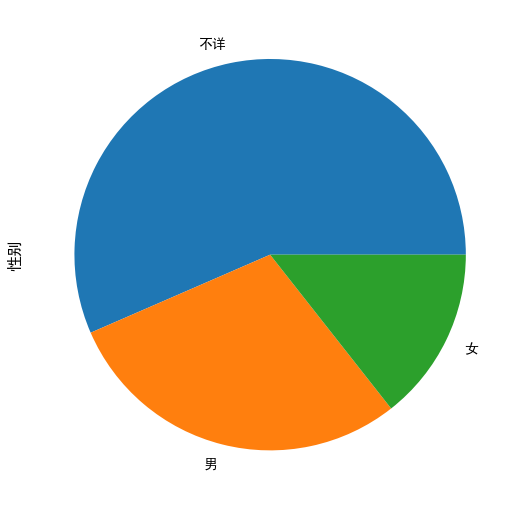

In [52]:
data['性别'].value_counts().plot(kind='pie',rot=0)

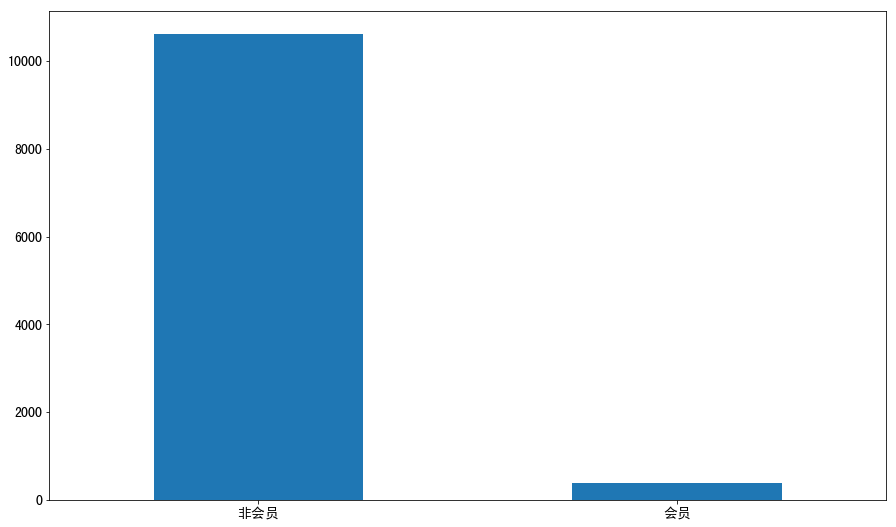

In [53]:
data['是否为知乎会员'].value_counts().plot(kind='bar',rot=0)

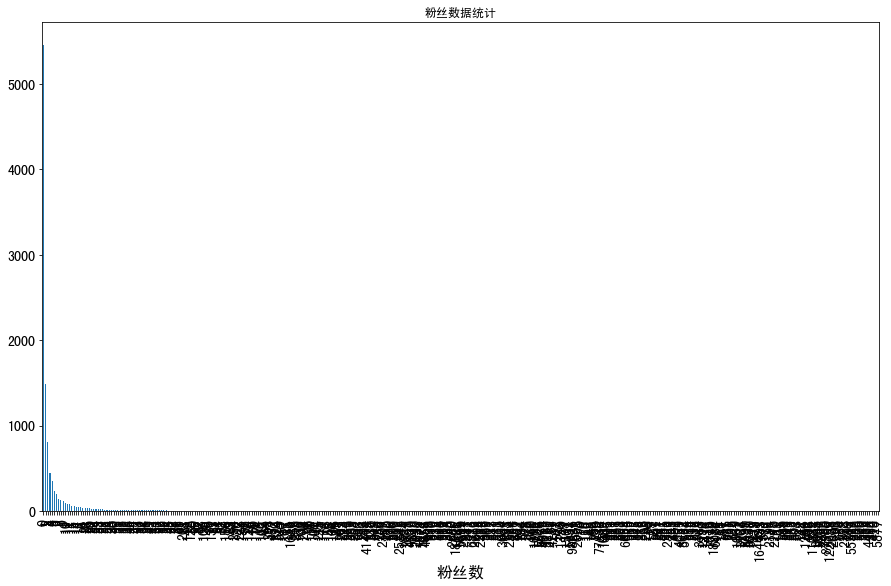

In [81]:
# plt.subplot2grid((2,3),(1,2))

data['粉丝数'].value_counts().plot(kind='bar')
plt.title(u"粉丝数据统计")
plt.xlabel(u"粉丝数")  
plt.show()

In [63]:
# df_inner[‘group’] = np.where(df_inner[‘粉丝数’] > 3000,’high’,’low’)